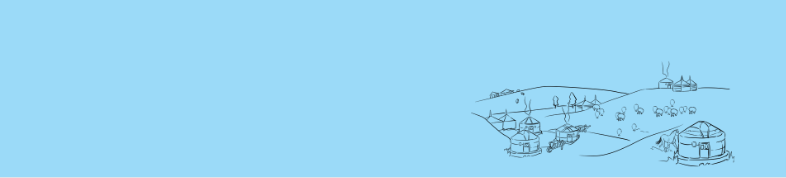
<div style="text-align: center"> <h3>DIGITAL NOMADS INSURANCE</h3></div>

This notebook focuses on insurance charges based on customer profiles. It addresses the challenge of accurately determining insurance premiums that align with individual policyholders' characteristics, striking a balance between competitive pricing and the financial stability of the company.

This notebook has following sections:

1.Data Import and Library Installation\
2.Statistical Analysis and Exploratory Data Analysis\
3.Building Prediction Models\
4.Personalized Insurance Quotetion 

### 1.Data Import and Library Installation

In [1]:
import pandas as pd              
import numpy as np               
import seaborn as sns            
import matplotlib.pyplot as plt  
import matplotlib.dates as mdates
from tqdm.notebook import tqdm   

In [2]:
data = pd.read_csv('Medical_Insurance_dataset.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
data.describe(include=['O'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### 2.Statistical Analysis and Exploratory Data Analysis

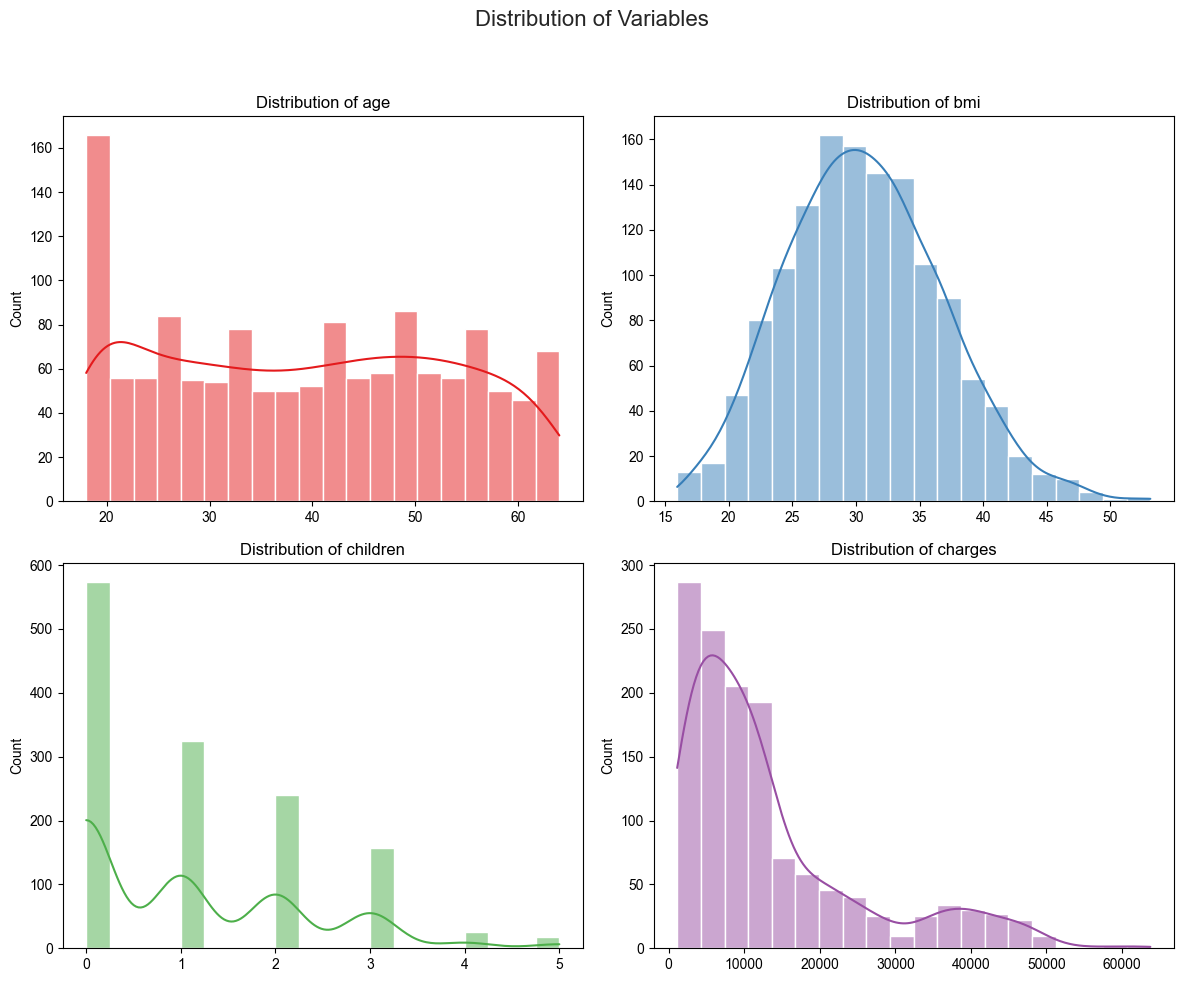

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numeric variables for distribution plots
numeric_vars = ['age', 'bmi', 'children', 'charges']

# Set up the figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Customize the style and color palette
sns.set(style="whitegrid")
palette = "Set1"  
# Create advanced distribution plots
for i, var in enumerate(numeric_vars):
    row, col = i // 2, i % 2
    sns.histplot(data=data, x=var, bins=20, kde=True, color=sns.color_palette(palette)[i], ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {var}')
    axes[row, col].set_xlabel("")  # Remove x-axis label for better spacing

# Add a title to the entire plot
fig.suptitle("Distribution of Variables", fontsize=16)

# Adjust subplot layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


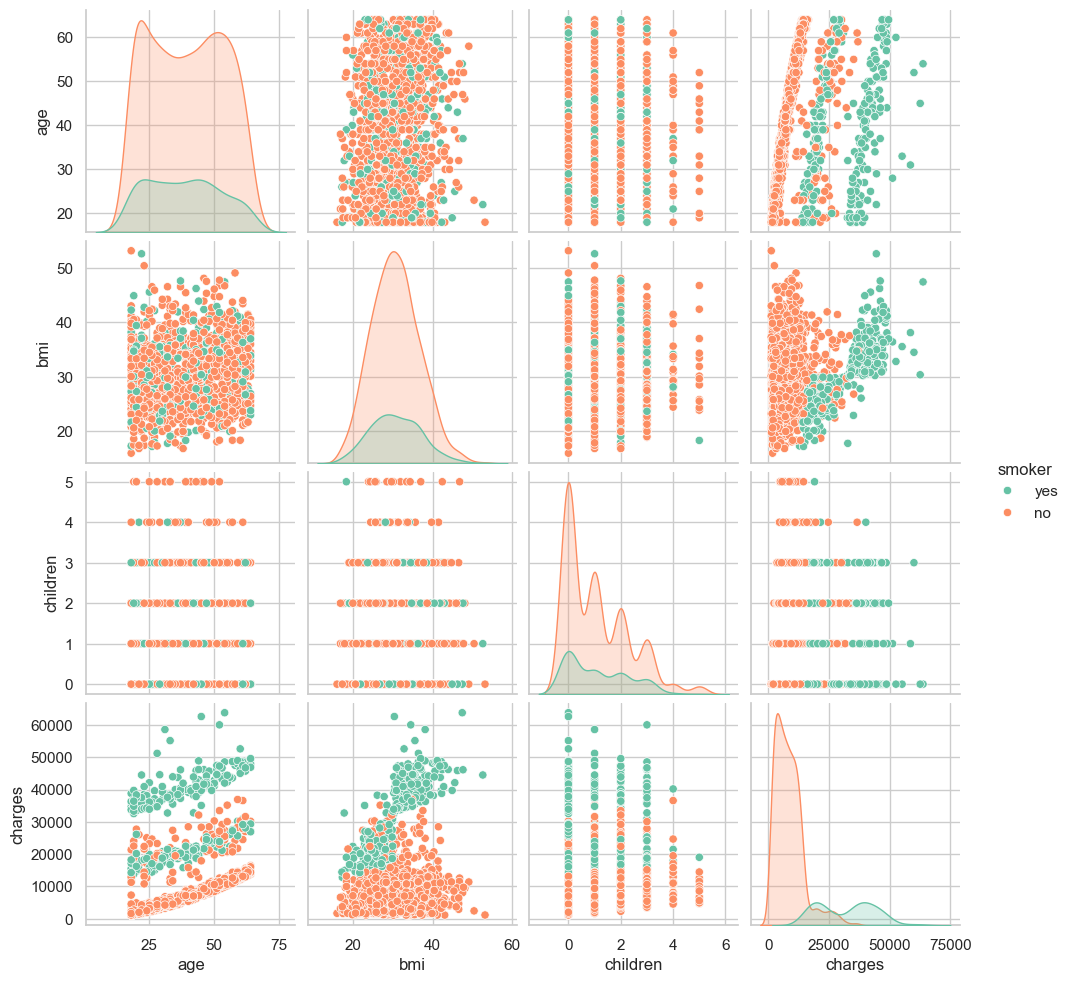

In [6]:
sns.pairplot(data, hue="smoker", palette="Set2")

### Anova :  "Null Hypothesis – There is no significant difference among the categories"

In [7]:
import pandas as pd
from scipy import stats

# Define your categorical independent variables
categorical_vars = ['region', 'smoker', 'sex' ,'age','bmi' , 'children']  # Add more as needed
dependent_var = 'charges'

# Perform one-way ANOVA for each categorical variable
for var in categorical_vars:
    groups = data[var].unique()
    anova_data = [data[data[var] == group][dependent_var] for group in groups]
    f_statistic, p_value = stats.f_oneway(*anova_data)

    # Check if the p-value is significant
    alpha = 0.05  # Set your significance level
    if p_value < alpha:
        print(f'ANOVA results for {var}: There are significant differences in insurance charges between categories (p-value={p_value:.4f})')
    else:
        print(f'ANOVA results for {var}: There are no significant differences in insurance charges between categories (p-value={p_value:.4f})')


ANOVA results for region: There are significant differences in insurance charges between categories (p-value=0.0309)
ANOVA results for smoker: There are significant differences in insurance charges between categories (p-value=0.0000)
ANOVA results for sex: There are significant differences in insurance charges between categories (p-value=0.0361)
ANOVA results for age: There are significant differences in insurance charges between categories (p-value=0.0000)
ANOVA results for bmi: There are no significant differences in insurance charges between categories (p-value=0.0837)
ANOVA results for children: There are significant differences in insurance charges between categories (p-value=0.0058)


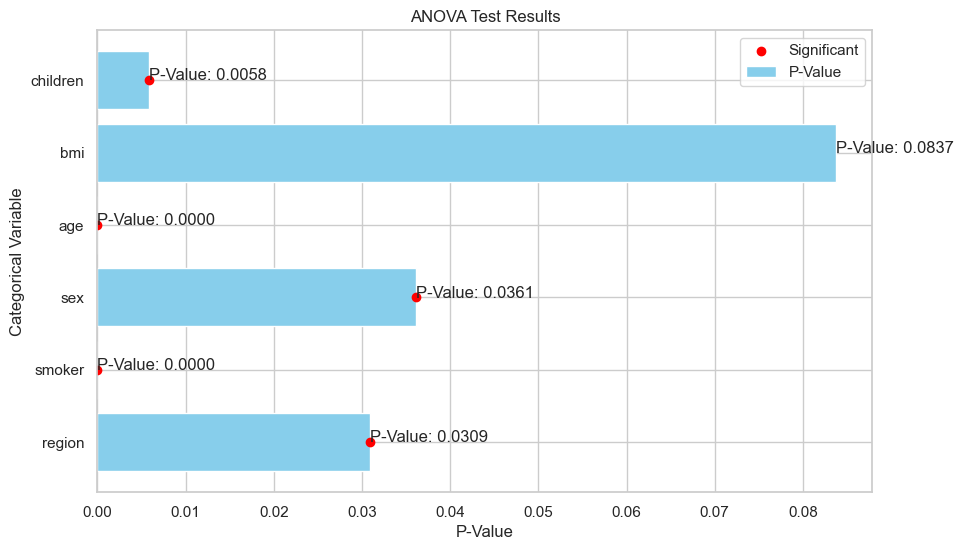

In [8]:
import matplotlib.pyplot as plt

# Define the categorical variables and their corresponding p-values from your ANOVA test
categorical_vars = ['region', 'smoker', 'sex', 'age', 'bmi', 'children']
p_values = [0.0309, 0.0000, 0.0361, 0.0000, 0.0837, 0.0058]

# Set your significance level
alpha = 0.05

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(categorical_vars, p_values, color='skyblue', label='P-Value')
significant = [p < alpha for p in p_values]
plt.scatter([p_values[i] for i, sig in enumerate(significant) if sig], 
            [categorical_vars[i] for i, sig in enumerate(significant) if sig], 
            color='red', marker='o', label='Significant')
plt.xlabel('P-Value')
plt.ylabel('Categorical Variable')
plt.title('ANOVA Test Results')
plt.legend()

# Customize the plot to add p-values as labels
for i, var in enumerate(categorical_vars):
    plt.text(p_values[i], var, f'P-Value: {p_values[i]:.4f}', ha='left')

plt.show()


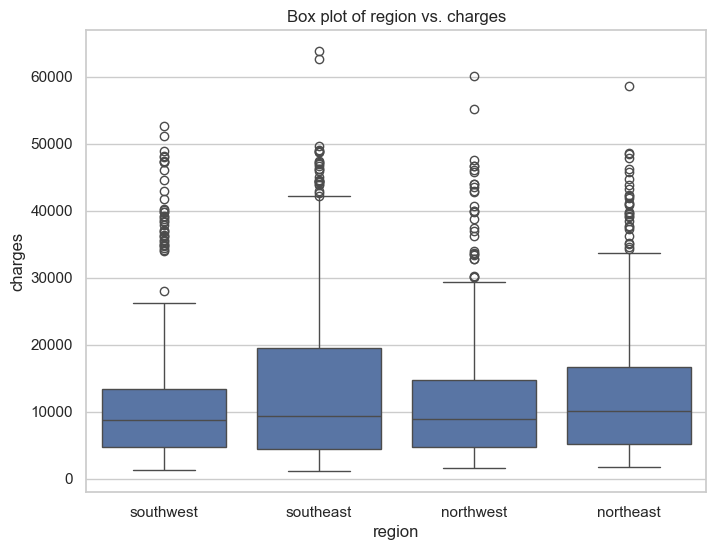

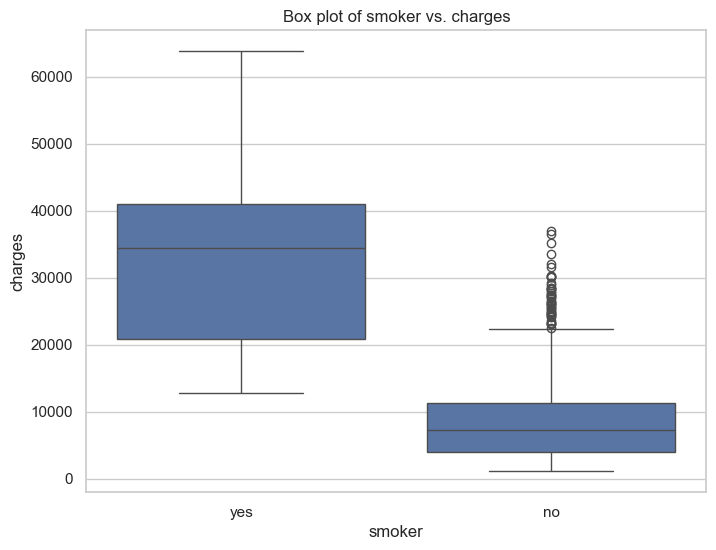

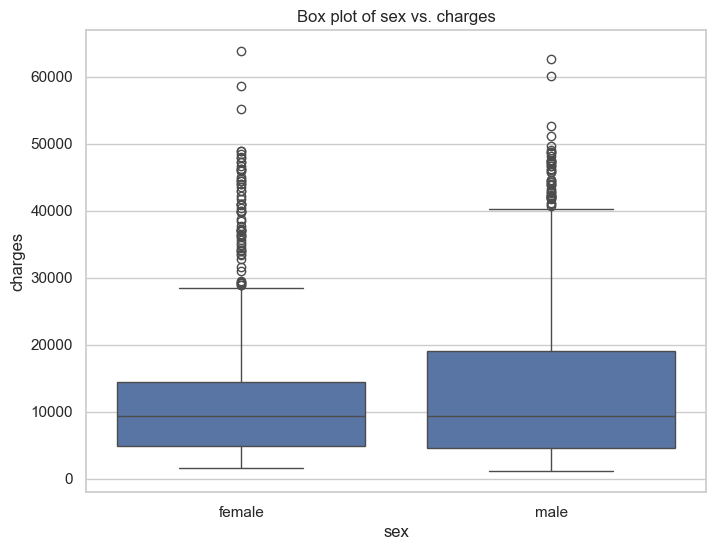

In [9]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


# Define your categorical independent variables
categorical_vars = ['region', 'smoker', 'sex']  # Add more as needed
dependent_var = 'charges'

# Create box plots for each categorical variable
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=var, y=dependent_var, data=data)
    plt.title(f'Box plot of {var} vs. {dependent_var}')
    plt.show()

/var/folders/lp/hdcvkrm129xd2hnyxjdc91280000gn/T/ipykernel_22524/2197609689.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


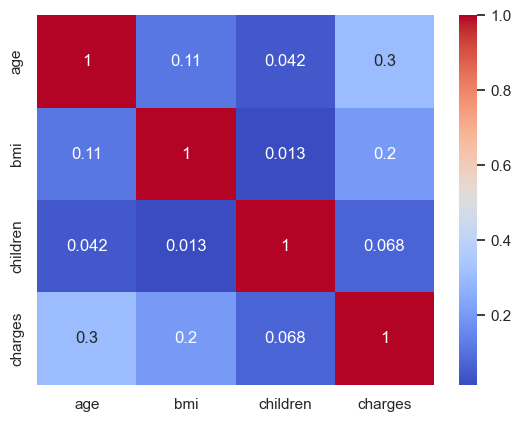

In [10]:
# Correlation Analysis
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### 3.Building Prediction Models

In [11]:
data['charges'] = data['charges'].astype(int)

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=["sex", "smoker", "region"], drop_first=True)

# Split the data into training and test sets
X = data.drop("charges", axis=1)
y = data["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Linear Regression
model_lm = LinearRegression()
model_lm.fit(X_train, y_train)
pred_lm = model_lm.predict(X_test)

# Decision Tree
model_rpart = DecisionTreeRegressor()
model_rpart.fit(X_train, y_train)
pred_rpart = model_rpart.predict(X_test)

# Random Forest
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)

# Support Vector Machine (SVM)
model_svm = SVR()
model_svm.fit(X_train, y_train)
pred_svm = model_svm.predict(X_test)

# Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
pred_nb = model_nb.predict(X_test)

# Calculate model performance
lm_mae = mean_absolute_error(y_test, pred_lm)
lm_mse = mean_squared_error(y_test, pred_lm)
lm_r2 = r2_score(y_test, pred_lm)

rpart_mae = mean_absolute_error(y_test, pred_rpart)
rpart_mse = mean_squared_error(y_test, pred_rpart)
rpart_r2 = r2_score(y_test, pred_rpart)

rf_mae = mean_absolute_error(y_test, pred_rf)
rf_mse = mean_squared_error(y_test, pred_rf)
rf_r2 = r2_score(y_test, pred_rf)

svm_mae = mean_absolute_error(y_test, pred_svm)
svm_mse = mean_squared_error(y_test, pred_svm)
svm_r2 = r2_score(y_test, pred_svm)

nb_mae = mean_absolute_error(y_test, pred_nb)
nb_mse = mean_squared_error(y_test, pred_nb)
nb_r2 = r2_score(y_test, pred_nb)

# Create a data frame to compare the results
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "Support Vector Machine", "Naive Bayes"],
    "MAE": [lm_mae, rpart_mae, rf_mae, svm_mae, nb_mae],
    "RMSE": [lm_mse, rpart_mse, rf_mse, svm_mse, nb_mse],
    "R2": [lm_r2, rpart_r2, rf_r2, svm_r2, nb_r2]
})

# Print the results
print(results)

                    Model          MAE          RMSE        R2
0       Linear Regression  4013.097597  3.055248e+07  0.800174
1           Decision Tree  3164.667910  4.303799e+07  0.718514
2           Random Forest  2424.174315  1.766643e+07  0.884454
3  Support Vector Machine  8374.169999  1.712723e+08 -0.120192
4             Naive Bayes  8708.958955  1.527888e+08  0.000697


### 4.Personalized Insurance Quotation - building an WEB APP 

In [13]:
# Example for making a prediction for a new client
new_client = pd.DataFrame({
    "age": [30],
    "bmi": [22],
    "children": [2],
    "sex_male": [0],  # Male client
    "smoker_yes": [1],# Smoker
    "region_northwest": [0],
    "region_southeast": [1],
    "region_southwest": [0]
})

pred_rf_new_client = model_rf.predict(new_client)
print(pred_rf_new_client)

[17967.51]


In [14]:
data_for = data.drop('charges', axis=1, inplace=True)

In [15]:
import streamlit as st

from streamlit_jupyter import StreamlitPatcher, tqdm
#StreamlitPatcher().jupyter() 


import pandas as pd
import pickle
from PIL import Image
      
st.header("DIGITAL NOMAD INSURANCE QUOTATION:")
image = Image.open('yurt.jpg') 
st.image(image, use_column_width=True)

st.write("Please insert values, to get Isurance Charges Reccomendation")

age = st.slider('age:', 18, 100)
sex = st.checkbox('sex:')
sex = st.radio('sex:',
                  ['0',
                   '1'])
bmi = st.slider('bmi',10, 55)
children = st.slider('children:', 0, 5)
smoker = st.radio('smoker_yes:',
                   ['1',
                     '0'])
region = st.radio('region:',
                 [ '1'  , 
                   '2' ,
                   '3'])             
data = {
    "age": age,
    "bmi": bmi,
    "children": children,
    "sex_male": sex,  # Male client
    "smoker_yes": smoker,# Smoker
    "region_northwest": region,
    "region_southeast": region,
    "region_southwest": region}


features = pd.DataFrame(data, index=[0])

load_model = pickle.load(open('solubility_model.pkl', 'rb'))

prediction = load_model.predict(features)

st.subheader('Recomended Charges for given details:') 
st.write(prediction)

ModuleNotFoundError: No module named 'streamlit'

In [16]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 13.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 10.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.9/996.9 kB 7.0 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 10.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 3.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
